<a href="https://colab.research.google.com/github/puttipongyy/Dwh/blob/main/Project2_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

**Due Date: Sunday, October 11**

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [ ]:
from IPython.lib.display import YouTubeVideo

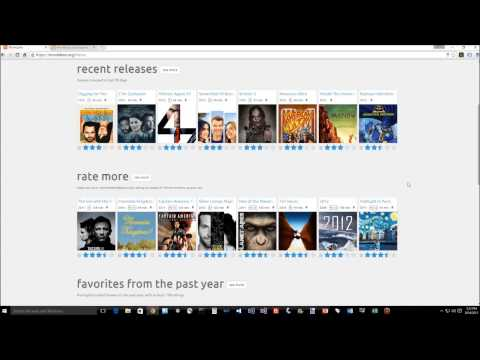

In [ ]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

1. นายตะวัน เบ้าหล่อเพชร   643020501-6 Tawan.b@kkumail.com
2. นางสาวพัณณิตา ทองบ่อ  643020508-2 Punnita.t@kkumail.com
3. นายพุทธิพงศ์ ยางนอก     643021268-1 Puttipongyy@kkumail.com
4. นายศตวรรษ มูลสันเทียะ   643021273-8 Satawat.m@kkumail.com
5. นางสาวจินดาพร โพธิ์ภูมี   643021262-3 Jindaporn.p@kkumail.com

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:**
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Problem 1:

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

In [ ]:
from google.colab import drive
# To mount at google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need

users_header = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/users.dat", sep="::" , header=None, names= users_header )

ratings_header = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/ratings.dat", sep="::" , header=None, names= ratings_header , encoding ='utf-8')

movies_header = ['MovieID', 'Title', 'Genres']
movies = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/movies.dat", sep="::" , header=None, names= movies_header, encoding ='latin-1') #utf-8 error something so....

#-------------------------------
# Merge data
movies_ratings = ratings.merge(users, how = 'left', on = 'UserID').merge(movies, how = 'left', on = 'MovieID')

#-------------------------------
# Create a HDF5
movies_ratings.to_hdf("/content/drive/MyDrive/DataForBig/Proj2/movieRating.h5", key="dfKey0")



<ipython-input-61-d244f3ff4558>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/users.dat", sep="::" , header=None, names= users_header )
<ipython-input-61-d244f3ff4558>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/ratings.dat", sep="::" , header=None, names= ratings_header , encoding ='utf-8')
<ipython-input-61-d244f3ff4558>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different fr

In [ ]:
#-------------------------------
# Reading a HDF5
movieDf = pd.read_hdf("/content/drive/MyDrive/DataForBig/Proj2/movieRating.h5", key="dfKey0")

In [ ]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
movies_ratings

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------





In [ ]:
from google.colab import drive
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
# To mount at google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
col1 = ['user_id','gender','age','occupation','zip_code']
users = pd.read_table('/content/drive/MyDrive/DataForBig/Proj2/users.dat', sep = '::', header = None, names = col1, engine='python')
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
col2 = ['user_id','movies_id','rating','timestamp']
ratings = pd.read_table('/content/drive/MyDrive/DataForBig/Proj2/ratings.dat', sep = '::', header = None, names = col2, engine='python')
ratings.head()

,user_id,movies_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
col3 = ['movies_id','title','genres']
movies = pd.read_table('/content/drive/MyDrive/DataForBig/Proj2/movies.dat', sep = '::', header = None, names = col3, engine='python',encoding = "latin-1")
movies.head()

,movies_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df1 = users .merge(ratings, how="left", on='user_id')# Your code goes here.
df2 = df1.merge(movies , how="left", on='movies_id')# Add as many cells as you need
# Create a HDF5
users.to_hdf('data.h5', key='users')
ratings.to_hdf('data.h5', key='ratings')
movies.to_hdf('data.h5', key='movies')
df2.to_hdf('data.h5', key='df2')

In [ ]:
df1

,user_id,gender,age,occupation,zip_code,movies_id,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [ ]:
df2

,user_id,gender,age,occupation,zip_code,movies_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541,Weekend at Bernie's (1989),Comedy
1000205,6040,M,25,6,11106,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,M,25,6,11106,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,M,25,6,11106,1096,4,956715648,Sophie's Choice (1982),Drama


In [ ]:
#How many movies have an average rating over 4.5 overall
average_rating = df2[['title','rating']].groupby('title').mean('rating')

In [ ]:
average_rating[average_rating['rating'] > 4.5].count()

rating    21
dtype: int64

In [ ]:
#How many movies have an average rating over 4.5 among men? How about women?
gender_average_rating = df2[['title','rating','gender']]
M_gender = gender_average_rating[gender_average_rating['gender']== 'M']
F_gender = gender_average_rating[gender_average_rating['gender']== 'F']
M_gender_average_rating = M_gender.groupby('title').mean()
F_gender_average_rating = F_gender.groupby('title').mean()

<ipython-input-16-bc9e16abd6e6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  M_gender_average_rating = M_gender.groupby('title').mean()
<ipython-input-16-bc9e16abd6e6>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  F_gender_average_rating = F_gender.groupby('title').mean()


In [ ]:
M_gender_average_rating[M_gender_average_rating['rating']>4.5].count()

rating    23
dtype: int64

In [ ]:
F_gender_average_rating[F_gender_average_rating['rating']>4.5].count()

rating    51
dtype: int64

In [ ]:
#How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
age_rating = df2[['title','age','gender','rating']]
age_over_30_M_rating = age_rating[(age_rating['gender']== 'M') & (age_rating['age'] > 30)]
age_over_30_F_rating = age_rating[(age_rating['gender']== 'F') & (age_rating['age'] > 30)]
median_M_rating = age_over_30_M_rating.groupby('title').median()
median_F_rating = age_over_30_F_rating.groupby('title').median()

<ipython-input-19-5b1dab81be19>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_M_rating = age_over_30_M_rating.groupby('title').median()
<ipython-input-19-5b1dab81be19>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_F_rating = age_over_30_F_rating.groupby('title').median()


In [ ]:
median_M_rating[median_M_rating['rating']>4.5].count()

age       86
rating    86
dtype: int64

In [ ]:
median_F_rating[median_F_rating['rating']>4.5].count()

age       149
rating    149
dtype: int64

In [ ]:
#What are the ten most popular movies?
most_popular_movies = df2[['title','rating']]
most_popular_movies_5 = most_popular_movies[most_popular_movies['rating'] == 5 ]
most_popular = most_popular_movies_5[['title','rating',]].groupby('title').count().sort_values(by='rating',ascending = False)

In [ ]:
most_popular.head(10)

,rating
title,
American Beauty (1999),1963
Star Wars: Episode IV - A New Hope (1977),1826
Raiders of the Lost Ark (1981),1500
Star Wars: Episode V - The Empire Strikes Back (1980),1483
"Godfather, The (1972)",1475
Schindler's List (1993),1475
"Shawshank Redemption, The (1994)",1457
"Matrix, The (1999)",1430
Saving Private Ryan (1998),1405


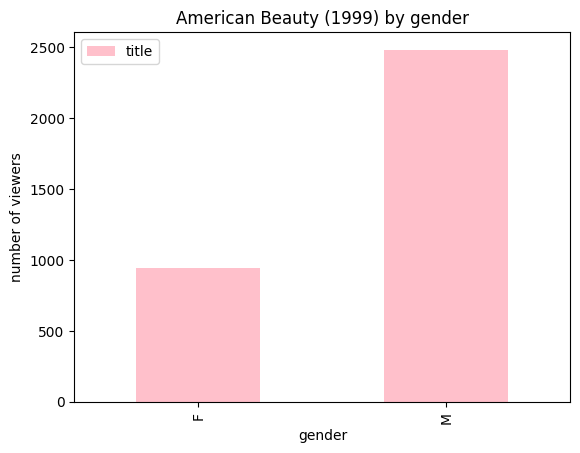

In [ ]:
cjt = df2[['title','gender']]
cjt_1_american_beauty = cjt[cjt['title']=='American Beauty (1999)']
cjt_1 = cjt_1_american_beauty.groupby('gender').count()
cjt_1.plot(kind='bar', color = 'pink', title = 'American Beauty (1999) by gender')
plt.ylabel('number of viewers')
plt.show()

# Problem 2: Expand your investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




In [ ]:
#Plot a histogram of the ratings of all movies.
grouped_ratings = movieDf.groupby('Title')


# ข้อที่ 2.1 - 2.4

(array([ 56174.,      0., 107557.,      0.,      0., 261197.,      0.,
        348971.,      0., 226310.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

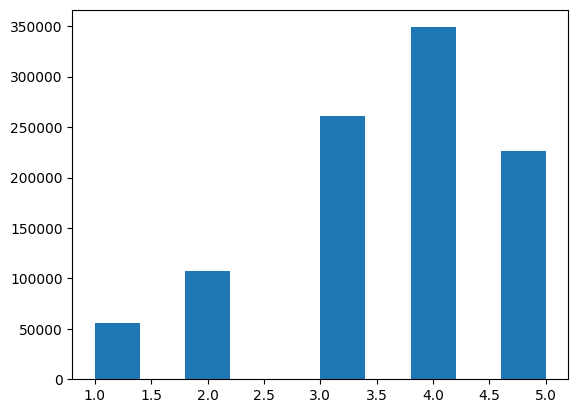

In [ ]:
plt.hist(movieDf["Rating"])

Text(0, 0.5, 'Frequency')

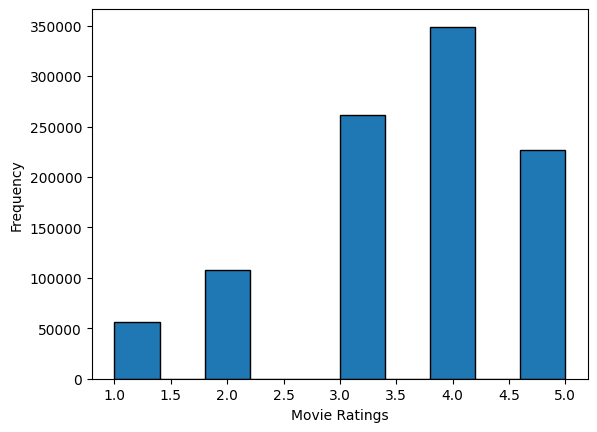

In [ ]:
#ข้อที่2.1
plt.hist(movieDf["Rating"],edgecolor='black')
plt.xlabel('Movie Ratings')
plt.ylabel('Frequency')

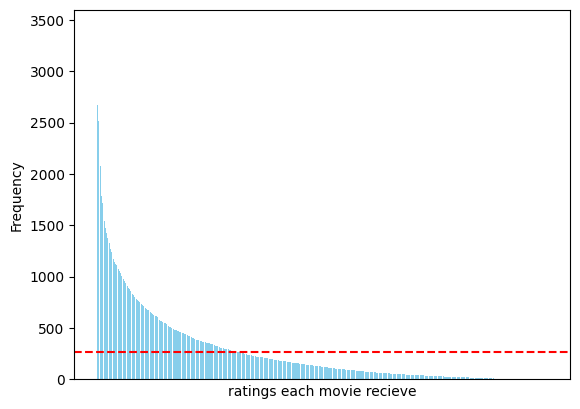

In [ ]:
# ข้อที่ 2.2
#Plot a histogram of the number of ratings each movie recieved.
tt = movieDf[['Title','Rating']]

data_nb_of_rating = tt.groupby('Title').count().sort_values(by='Rating',ascending=False). reset_index()

mean = data_nb_of_rating['Rating'].mean()
plt.bar(data_nb_of_rating['Title'], data_nb_of_rating['Rating'], color='skyblue')
plt.xticks([])
plt.xlabel('ratings each movie recieve')
plt.ylabel('Frequency')
plt.axhline(y=mean, color='red', linestyle='dashed', label='Mean')

Text(0, 0.5, 'Frequency')

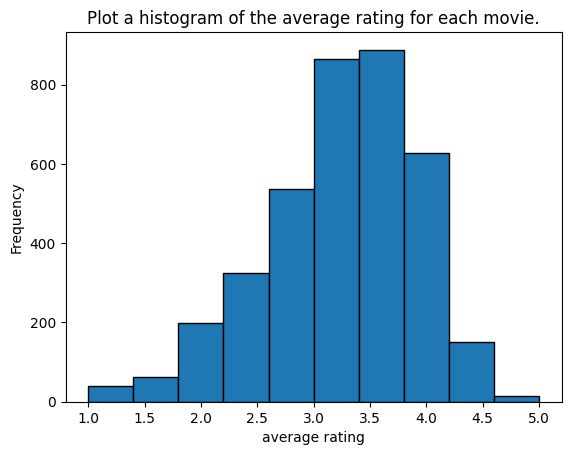

In [ ]:
# ข้อที่2.3
#Plot a histogram of the average rating for each movie.
plt.hist(movieDf.groupby('Title')["Rating"].mean(),edgecolor='black')
plt.title('Plot a histogram of the average rating for each movie.')
plt.xlabel('average rating')
plt.ylabel('Frequency')

In [ ]:
# ข้อที่ 2.4
#Plot a histogram of the average rating for movies which are rated more than 100 times.
mean = movieDf.groupby('Title')["Rating"].mean()
mean

Title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: Rating, Length: 3706, dtype: float64

In [ ]:
df_mean = mean.to_frame(name='mean_rate')

In [ ]:
count = tt.groupby('Title').count()
count

,Rating
Title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
...,...
"Zed & Two Noughts, A (1985)",29
Zero Effect (1998),301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2


In [ ]:
newdf = df_mean.merge(count, how='right',on="Title").reset_index()

In [ ]:
newdf

,Title,mean_rate,Rating
0,"$1,000,000 Duck (1971)",3.027027,37
1,'Night Mother (1986),3.371429,70
2,'Til There Was You (1997),2.692308,52
3,"'burbs, The (1989)",2.910891,303
4,...And Justice for All (1979),3.713568,199
...,...,...,...
3701,"Zed & Two Noughts, A (1985)",3.413793,29
3702,Zero Effect (1998),3.750831,301
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000,2
3704,Zeus and Roxanne (1997),2.521739,23


In [ ]:
ratingmore100 = newdf[newdf['Rating'] > 100]

(array([  7.,  34.,  83., 140., 228., 317., 396., 432., 286.,  83.]),
 array([1.46666667, 1.77605096, 2.08543524, 2.39481953, 2.70420382,
        3.01358811, 3.3229724 , 3.63235669, 3.94174098, 4.25112527,
        4.56050955]),
 <BarContainer object of 10 artists>)

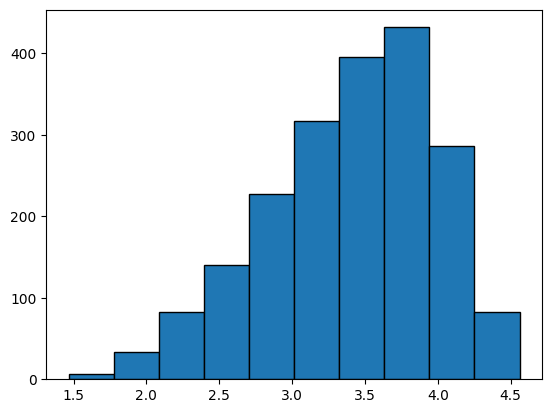

In [ ]:
plt.hist(ratingmore100['mean_rate'], edgecolor='black')

In [ ]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
mean_oc = movieDf.pivot_table('Rating', index = 'Occupation', aggfunc= 'mean').dropna().reset_index()

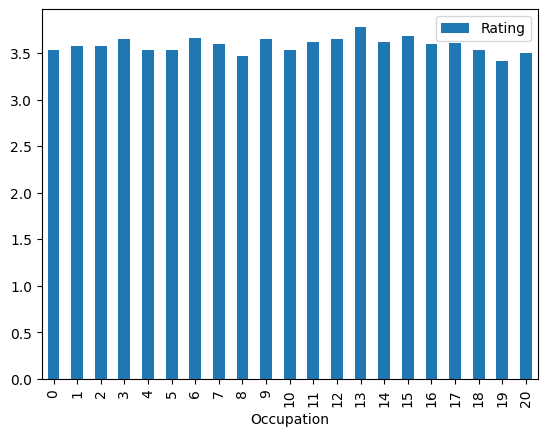

In [ ]:
bar_oc = mean_oc.plot.bar(x='Occupation',y='Rating')

In [ ]:
mean_age = movieDf.pivot_table('Rating', index = 'Age', aggfunc= 'mean').dropna().reset_index()

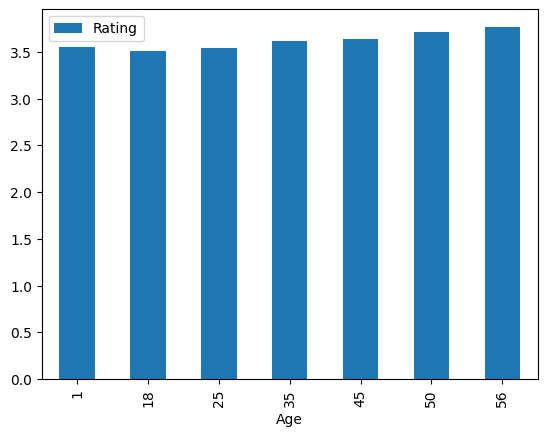

In [ ]:
bar_age = mean_age.plot.bar(x='Age',y='Rating')

In [ ]:
movie_select = movieDf[['Age','Rating']]


In [ ]:
movie_select

,Age,Rating
0,1,5
1,1,3
2,1,3
3,1,4
4,1,5
...,...,...
1000204,25,1
1000205,25,5
1000206,25,5
1000207,25,4


In [ ]:
movie_select[movie_select['Age']==1]

,Age,Rating
0,1,5
1,1,3
2,1,3
3,1,4
4,1,5
...,...,...
994629,1,4
994630,1,1
994631,1,1
994632,1,5


# ข้อที่2**.5**

In [ ]:
movie_select[movie_select['Age']==1].value_counts('Rating')[1]

2238

In [ ]:
movie_select[movie_select['Age']==1].value_counts('Rating')[2]/27211*100

10.96247840946676

In [ ]:
movie_select[movie_select['Age']==1].value_counts('Rating')[3]/27211*100

23.4464003527985

In [ ]:
movie_select[movie_select['Age']==1].value_counts('Rating')[4]/27211*100

32.36926243063467

In [ ]:
movie_select[movie_select['Age']==1].value_counts('Rating')[5]/27211*100

24.997243761714014

In [ ]:
def percent_rating(df, age):
  rating_percent = [100* (df[df['Age']== age ].value_counts('Rating')[i])/len(df[df['Age']== age]) for i in range(1,6)]
  return rating_percent

In [ ]:
age_list = [1, 18, 25, 35, 45, 50, 56]

In [ ]:
rating_age = [percent_rating(movieDf, age) for age in age_list]

In [ ]:
rating_age

[[8.224615045386058,
  10.96247840946676,
  23.446400352798502,
  32.36926243063467,
  24.997243761714014],
 [7.117404759829134,
  12.026523406852062,
  25.935511289338333,
  32.82244355330834,
  22.09811699067213],
 [6.041622425143342,
  11.33012771895762,
  26.364661388020913,
  34.590298213148074,
  21.673290254730052],
 [4.55621272041125,
  10.177233509042578,
  26.62773928031236,
  36.17181650527881,
  22.466997984955],
 [4.07614219267514,
  10.08812310929896,
  26.677268542321812,
  36.27037174321141,
  22.888094412492677],
 [4.0667678300455234,
  8.267347220306249,
  25.472478962615533,
  36.5346944406125,
  25.658711546420196],
 [3.999484270242393,
  7.738525012893244,
  23.62815884476534,
  36.86694172253739,
  27.76689014956163]]

In [ ]:
ra = pd.DataFrame(rating_age, columns = range(1,6), dtype = float)
ra

,1,2,3,4,5
0,8.224615,10.962478,23.446400,32.369262,24.997244
1,7.117405,12.026523,25.935511,32.822444,22.098117
2,6.041622,11.330128,26.364661,34.590298,21.673290
3,4.556213,10.177234,26.627739,36.171817,22.466998
4,4.076142,10.088123,26.677269,36.270372,22.888094
5,4.066768,8.267347,25.472479,36.534694,25.658712
6,3.999484,7.738525,23.628159,36.866942,27.766890


In [ ]:
ra['Age'] = age_list


In [ ]:
ra=ra.reindex(columns=['Age', 1, 2,3,4,5])

In [ ]:
ra = ra.reset_index(drop=True)
ra

,Age,1,2,3,4,5
0,1,8.224615,10.962478,23.446400,32.369262,24.997244
1,18,7.117405,12.026523,25.935511,32.822444,22.098117
2,25,6.041622,11.330128,26.364661,34.590298,21.673290
3,35,4.556213,10.177234,26.627739,36.171817,22.466998
4,45,4.076142,10.088123,26.677269,36.270372,22.888094
5,50,4.066768,8.267347,25.472479,36.534694,25.658712
6,56,3.999484,7.738525,23.628159,36.866942,27.766890


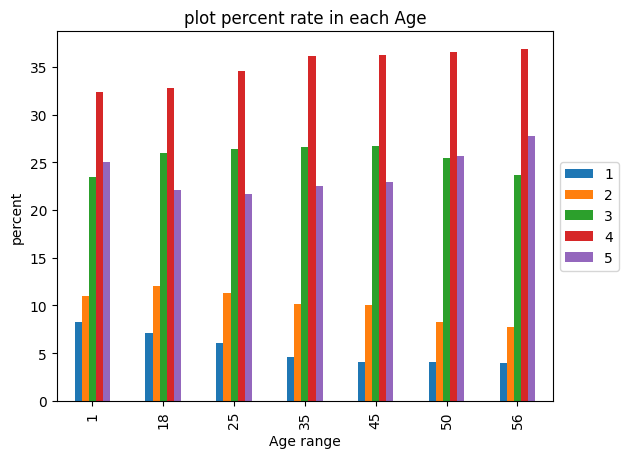

In [ ]:
ra_plot = ra.plot(x="Age", y=[1,2,3,4,5], kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Age range')
plt.ylabel('percent')
plt.title ('plot percent rate in each Age')
plt.show()



# Problem 3:
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

### A scatter plot of men versus women and their mean rating for every movie

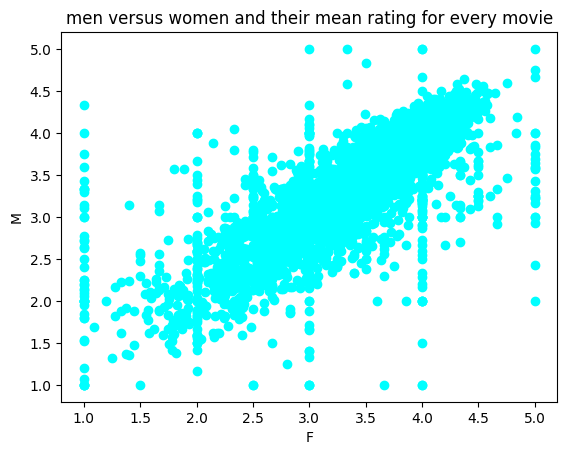

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
plt.scatter(mean_rating['F'], mean_rating['M'], c = 'cyan')
plt.xlabel('F')
plt.ylabel('M')
plt.title('men versus women and their mean rating for every movie')
plt.show()

In [ ]:
len(mean_rating)

3706

In [ ]:
mean_rating.reset_index()

Gender,Title,F,M
0,"$1,000,000 Duck (1971)",3.375000,2.761905
1,'Night Mother (1986),3.388889,3.352941
2,'Til There Was You (1997),2.675676,2.733333
3,"'burbs, The (1989)",2.793478,2.962085
4,...And Justice for All (1979),3.828571,3.689024
...,...,...,...
3701,"Zed & Two Noughts, A (1985)",3.500000,3.380952
3702,Zero Effect (1998),3.864407,3.723140
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000
3704,Zeus and Roxanne (1997),2.777778,2.357143


In [ ]:
avg_rating

,Title,Rating
0,"$1,000,000 Duck (1971)",3.027027
1,'Night Mother (1986),3.371429
2,'Til There Was You (1997),2.692308
3,"'burbs, The (1989)",2.910891
4,...And Justice for All (1979),3.713568
...,...,...
3701,"Zed & Two Noughts, A (1985)",3.413793
3702,Zero Effect (1998),3.750831
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000
3704,Zeus and Roxanne (1997),2.521739


In [ ]:
M_avg

,Title,Rating
0,"$1,000,000 Duck (1971)",2.761905
1,'Night Mother (1986),3.352941
2,'Til There Was You (1997),2.733333
3,"'burbs, The (1989)",2.962085
4,...And Justice for All (1979),3.689024
...,...,...
3666,"Zed & Two Noughts, A (1985)",3.380952
3667,Zero Effect (1998),3.723140
3668,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000
3669,Zeus and Roxanne (1997),2.357143


In [ ]:
mean_rating.corr()

Gender,F,M
Gender,,
F,1.00000,0.76319
M,0.76319,1.00000


### A scatter plot of men versus women and their mean rating for movies rated more than 200 times

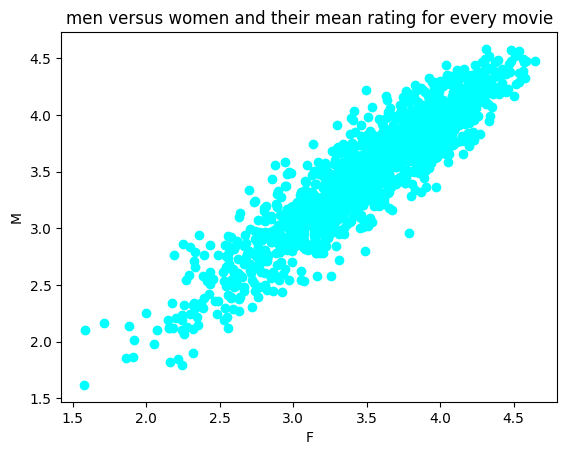

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
count_title = movieDf.groupby('Title').size()
active_title = mean_rating.index[count_title >= 200]
Gender_mean_rating_200up = mean_rating.loc[active_title]
df = Gender_mean_rating_200up
plt.scatter(df['F'], df['M'], c = 'cyan')
plt.xlabel('F')
plt.ylabel('M')
plt.title('men versus women and their mean rating for every movie')
plt.show()

### The correlation coefficent between the ratings of men and women

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#-------------------------------
corr_gender_rating = mean_rating.corr()
print(corr_gender_rating)

print("-"*50)

corr_gender_rating_200up = Gender_mean_rating_200up.corr()
print(corr_gender_rating_200up)

Gender        F        M
Gender                  
F       1.00000  0.76319
M       0.76319  1.00000
--------------------------------------------------
Gender         F         M
Gender                    
F       1.000000  0.918963
M       0.918963  1.000000


## Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




In [ ]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


##Conjecture On Age

- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

# ผู้สูงอายุมีการให้คะแนนใน genre action ที่คล้ายกันในทั้งสองเพศ

In [ ]:
age_56 = movieDf[movieDf['Age'] == 56]

In [ ]:
action_56 = movieDf[movieDf['Genres'] == 'Action']

In [ ]:
age_56

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
53,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance
54,2,3068,4,978299000,M,56,16,70072,"Verdict, The (1982)",Drama
55,2,1537,4,978299620,M,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),Comedy
56,2,647,3,978299351,M,56,16,70072,Courage Under Fire (1996),Drama|War
57,2,2194,4,978299297,M,56,16,70072,"Untouchables, The (1987)",Action|Crime|Drama
...,...,...,...,...,...,...,...,...,...,...
999740,6038,1387,2,956707005,F,56,1,14706,Jaws (1975),Action|Horror
999741,6038,2700,1,956715051,F,56,1,14706,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy
999742,6038,2716,3,956707604,F,56,1,14706,Ghostbusters (1984),Comedy|Horror
999743,6038,3396,3,956706827,F,56,1,14706,"Muppet Movie, The (1979)",Children's|Comedy


In [ ]:
mean_age_56 = age_56.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean').dropna()

In [ ]:
mean_ac_56 = action_56.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean')

In [ ]:
mean_ac_56

Gender,F,M
Title,,
American Strays (1996),NaN,2.000000
"Art of War, The (2000)",2.730769,2.796610
Assassination (1987),4.000000,2.863636
Avalanche (1978),3.000000,2.466667
Bad Boys (1995),3.562500,3.269697
...,...,...
Under Siege (1992),3.229508,3.275000
Under Siege 2: Dark Territory (1995),2.782609,2.938889
"View to a Kill, A (1985)",3.550000,3.228070


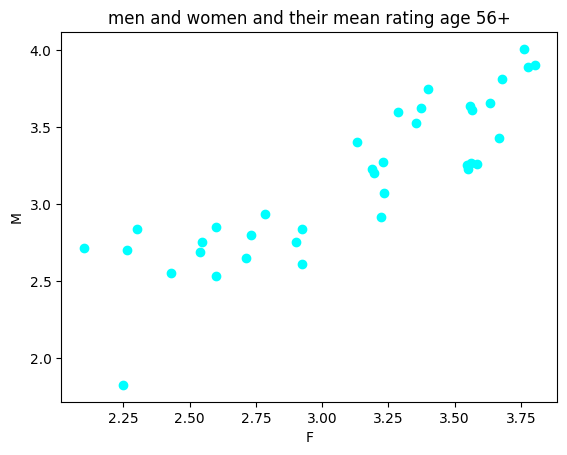

In [ ]:
mean_ac_56 = action_56.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean')
count_title_ac56 = action_56.groupby('Title').size()
active_title = mean_ac_56.index[count_title_ac56 >= 100]
mean_ac_56 = mean_ac_56.loc[active_title]
mean_ac_56.dropna()
df = mean_ac_56
plt.scatter(df['F'], df['M'], c = 'cyan')
plt.xlabel('F')
plt.ylabel('M')
plt.title('men and women and their mean rating age 56+')
plt.show()

# เปรียบเทียบ ค่า correlation coeficient ของค่าเฉลี่ยขอหนังแต่ละเรื่องของ ทั้งสองเพศ เทียบกับ ค่า correlation coeficient ของค่าเฉลี่ยขอหนังในหมวด action

In [ ]:
mean_age_56.corr()

Gender,F,M
Gender,,
F,1.000000,0.413094
M,0.413094,1.000000


In [ ]:
mean_ac_56.corr()

Gender,F,M
Gender,,
F,1.000000,0.868121
M,0.868121,1.000000


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t_stat, p_value = ttest_ind(mean_ac_56['F'], mean_ac_56['M'])
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  -0.403641289576967
P-Value:  0.6876728245162829


##Conjecture on Genres

- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

##Conjecture: genre thriller ทั้งสองเพศจะให้เรตติ้งใกล้เคียงกัน

In [ ]:
genre_thriller = movieDf[movieDf['Genres'] == 'Thriller']

In [ ]:
mean_gen_thriller = genre_thriller.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean').dropna()

In [ ]:
mean_gen_thriller


Gender,F,M
Title,,
"39 Steps, The (1935)",3.965517,4.107692
8MM (1999),2.906250,2.850962
Arlington Road (1999),3.512658,3.502101
Assassins (1995),2.894737,2.850467
"Assignment, The (1997)",3.571429,3.595238
...,...,...
Torn Curtain (1966),3.250000,3.357143
Trial by Jury (1994),2.571429,2.631579
Turbulence (1997),2.444444,2.261905


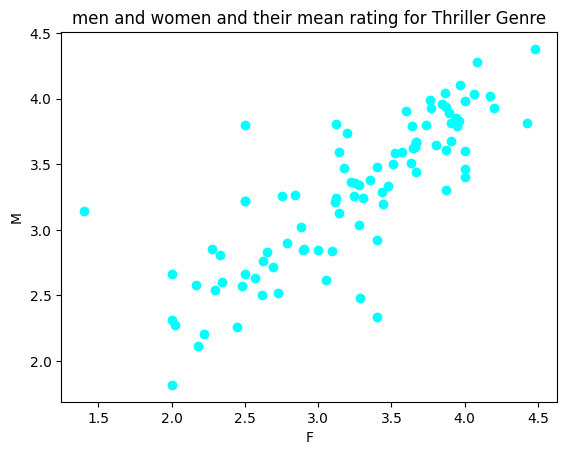

In [ ]:
df = mean_gen_thriller
plt.scatter(df['F'], df['M'], c = 'cyan')
plt.xlabel('F')
plt.ylabel('M')
plt.title('men and women and their mean rating for Thriller Genre')
plt.show()

In [ ]:
cor_thriller = mean_gen_thriller.corr()

In [ ]:
cor_thriller

Gender,F,M
Gender,,
F,1.000000,0.813697
M,0.813697,1.000000


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
t_stat, p_value = ttest_ind(mean_gen_thriller['F'],mean_gen_thriller['M'])
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  -0.49475468885352775
P-Value:  0.6213700101302829


In [ ]:
ztest(mean_gen_thriller['F'], mean_gen_thriller['M'], value=0)

(-0.49475468885352775, 0.6207732923224007)

# Problem 4:
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

### For example, which movie to make/buy? (seperating via Genre?)

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




In [ ]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
count_genre = movieDf.groupby('Genres').size()

In [ ]:
mean_genre = movieDf.pivot_table('Rating', index = 'Genres', aggfunc= 'mean').reset_index().dropna()

In [ ]:
mean_genre = movieDf.pivot_table('Rating', index = 'Genres', aggfunc= 'mean').reset_index().dropna()

In [ ]:
count_Age = movieDf.groupby('Age').size()
count_Age

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

In [ ]:
genre_count = movieDf.groupby('Genres').count()
genre_count = genre_count.sort_values('Title', ascending = False)['Title'].reset_index()
genre_count = genre_count.rename(columns={"Title": "count_genre" })
genre_count

,Genres,count_genre
0,Comedy,116883
1,Drama,111423
2,Comedy|Romance,42712
3,Comedy|Drama,42245
4,Drama|Romance,29170
...,...,...
296,Drama|Romance|Western,29
297,Children's|Fantasy,27
298,Comedy|Film-Noir|Thriller,5
299,Film-Noir|Horror,2


In [ ]:
counted_genre_df = movieDf.merge(genre_count, how = 'left', on = 'Genres')
counted_genre_df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,count_genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,111423
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,8220
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,3178
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,111423
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,7870
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy,116883
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War,6663
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama,42245
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama,111423


In [ ]:
active_df = counted_genre_df[counted_genre_df['count_genre'] >= 100]

In [ ]:
age_mean_genre = active_df.pivot_table('Rating', index = 'Genres', columns = 'Age', aggfunc= 'mean').reset_index()

In [ ]:
active_genre = mean_genre.index[count_genre >= 18]
genre_real = mean_genre.loc[active_genre]
top_genre = genre_real.sort_values(by = 'Rating', ascending=False).head(10)
top_genre

,Genres,Rating
155,Animation|Comedy|Thriller,4.473837
297,Sci-Fi|War,4.449890
143,Animation,4.394336
268,Film-Noir|Mystery,4.367424
141,Adventure|War,4.346107
270,Film-Noir|Romance|Thriller,4.294382
21,Action|Adventure|Drama|Sci-Fi|War,4.292977
271,Film-Noir|Sci-Fi,4.273333
226,Crime|Film-Noir,4.264129
266,Film-Noir,4.258105


In [ ]:
active_genre_muen = mean_genre.index[count_genre >= 10000]
genre_real_muen = mean_genre.loc[active_genre_muen]
top_genre_muen = genre_real_muen.sort_values(by = 'Rating', ascending=False).head(10)
top_genre_muen

,Genres,Rating
262,Drama|War,4.098936
73,Action|Drama|War,4.047693
217,Crime|Drama,3.947094
260,Drama|Thriller,3.782552
239,Drama,3.780611
185,Comedy|Drama,3.720559
1,Action|Adventure,3.676814
187,Comedy|Drama|Romance,3.675129
87,Action|Sci-Fi|Thriller,3.664281
252,Drama|Romance,3.605417


In [ ]:
active_genre_saen = mean_genre.index[count_genre >= 100000]
genre_real_saen = mean_genre.loc[active_genre_saen]
top_genre_saen = genre_real_saen.sort_values(by = 'Rating', ascending=False).head(10)
top_genre_saen

,Genres,Rating
239,Drama,3.780611
176,Comedy,3.464456


In [ ]:
age_mean_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genres  301 non-null    object 
 1   1       292 non-null    float64
 2   18      298 non-null    float64
 3   25      299 non-null    float64
 4   35      300 non-null    float64
 5   45      299 non-null    float64
 6   50      299 non-null    float64
 7   56      289 non-null    float64
dtypes: float64(7), object(1)
memory usage: 18.9+ KB


In [ ]:
amg = age_mean_genre

In [ ]:
amg.corr()

<ipython-input-269-438871c3c5c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  amg.corr()


Age,1,18,25,35,45,50,56
Age,,,,,,,
1,1.000000,0.791174,0.778604,0.725972,0.697410,0.711687,0.583027
18,0.791174,1.000000,0.934261,0.828066,0.771547,0.741967,0.598474
25,0.778604,0.934261,1.000000,0.885201,0.837170,0.814912,0.669764
35,0.725972,0.828066,0.885201,1.000000,0.909913,0.857007,0.749623
45,0.697410,0.771547,0.837170,0.909913,1.000000,0.864986,0.750819
50,0.711687,0.741967,0.814912,0.857007,0.864986,1.000000,0.784228
56,0.583027,0.598474,0.669764,0.749623,0.750819,0.784228,1.000000


<ipython-input-270-45bc5498ffac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = amg.corr()


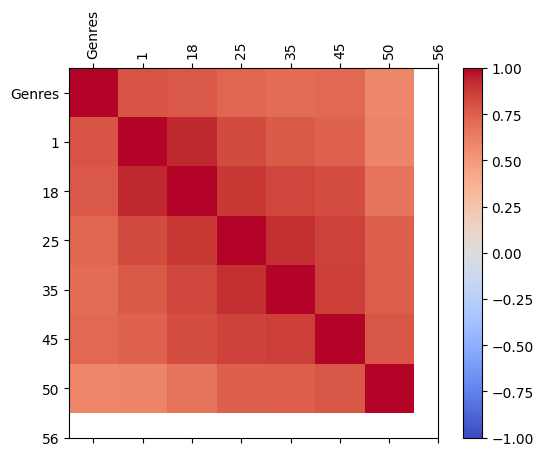

In [ ]:
corr = amg.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(amg.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(amg.columns)
ax.set_yticklabels(amg.columns)
plt.show()

In [ ]:
amg_18 = amg.iloc[:, 0:3:2]
amg_18 = amg_18.sort_values(18, ascending= False)
amg_18

Age,Genres,18
155,Animation|Comedy|Thriller,4.562500
295,Sci-Fi|War,4.471795
21,Action|Adventure|Drama|Sci-Fi|War,4.442142
238,Documentary|War,4.416667
143,Animation,4.410526
...,...,...
8,Action|Adventure|Children's|Sci-Fi,1.926829
7,Action|Adventure|Children's|Fantasy,1.692308
41,Action|Children's,1.678571
5,Action|Adventure|Children's,1.363636


In [ ]:
amg_25 = amg.iloc[:, 0:4:3]
amg_25 = amg_25.sort_values(25, ascending= False)
amg_25

Age,Genres,25
155,Animation|Comedy|Thriller,4.506711
143,Animation,4.428571
295,Sci-Fi|War,4.407950
21,Action|Adventure|Drama|Sci-Fi|War,4.390306
266,Film-Noir|Mystery,4.383475
...,...,...
7,Action|Adventure|Children's|Fantasy,1.941176
8,Action|Adventure|Children's|Sci-Fi,1.658120
41,Action|Children's,1.519608
5,Action|Adventure|Children's,1.263158


In [ ]:
amg_35 = amg.iloc[:, 0:5:4]
amg_35 = amg_35.sort_values(35, ascending= False)
amg_35

Age,Genres,35
295,Sci-Fi|War,4.474227
113,Adventure|Children's|Drama|Musical,4.446384
155,Animation|Comedy|Thriller,4.364238
141,Adventure|War,4.344000
266,Film-Noir|Mystery,4.338384
...,...,...
199,Comedy|Horror|Sci-Fi,2.166667
41,Action|Children's,2.074074
40,Action|Animation|Children's|Sci-Fi|Thriller|War,2.000000
8,Action|Adventure|Children's|Sci-Fi,1.739130


In [ ]:
amg_18_35 = amg.iloc[:, 0:5].drop(columns = 1)
amg_18_35

Age,Genres,18,25,35
0,Action,3.233253,3.282209,3.460765
1,Action|Adventure,3.636634,3.713771,3.642051
2,Action|Adventure|Animation,4.250000,4.059211,4.150000
3,Action|Adventure|Animation|Children's|Fantasy,2.588235,2.411765,2.814815
4,Action|Adventure|Animation|Horror|Sci-Fi,3.433962,3.620462,3.531034
...,...,...,...,...
296,Sci-Fi|Thriller|War,3.647059,3.269231,3.432432
297,Sci-Fi|War,4.471795,4.407950,4.474227
298,Thriller,3.393555,3.528716,3.608804
299,War,3.765432,3.848485,3.872807


In [ ]:
amg_18_35.corr()

<ipython-input-246-b53305f50188>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  amg_18_35.corr()


Age,18,25,35
Age,,,
18,1.000000,0.934261,0.828066
25,0.934261,1.000000,0.885201
35,0.828066,0.885201,1.000000


In [ ]:
count_genre

Genres
Action                                           12311
Action|Adventure                                 10446
Action|Adventure|Animation                         345
Action|Adventure|Animation|Children's|Fantasy      135
Action|Adventure|Animation|Horror|Sci-Fi           618
                                                 ...  
Sci-Fi|Thriller|War                                280
Sci-Fi|War                                        1367
Thriller                                         17851
War                                                991
Western                                           5689
Length: 301, dtype: int64

In [ ]:
animation = age_mean_genre[age_mean_genre['Genres'].str.contains('Animation')]

In [ ]:
animation.mean()

<ipython-input-185-12392c7865af>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  animation.mean()


Age
1     3.495422
18    3.512084
25    3.499289
35    3.475670
45    3.380482
50    3.580046
56    3.508967
dtype: float64

<ipython-input-182-eb6f2422768a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = animation.corr()


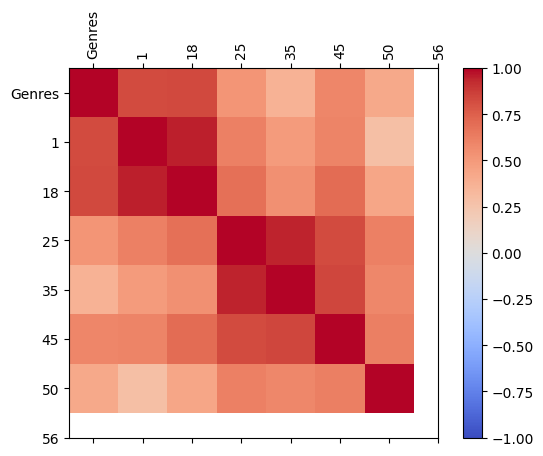

In [ ]:
corr = animation.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(animation.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(animation.columns)
ax.set_yticklabels(animation.columns)
plt.show()

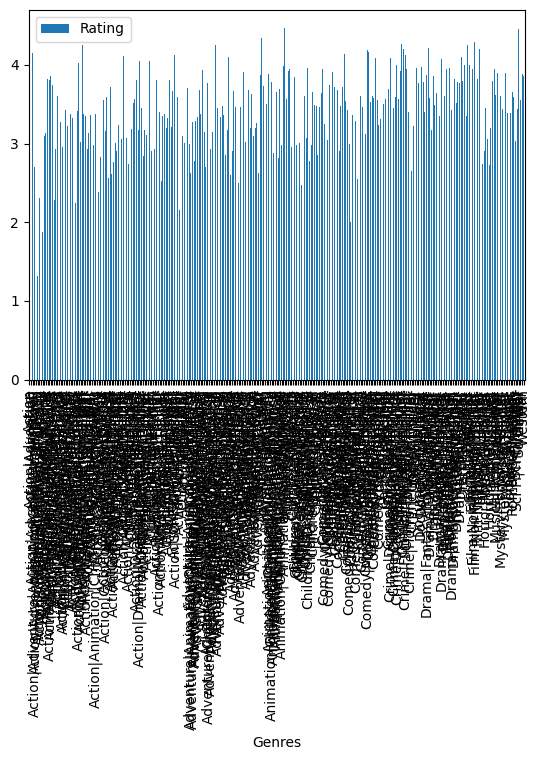

In [ ]:
bar_oc = mean_genre.plot.bar(x='Genres',y='Rating')

#การวิเคราะห์


In [ ]:
count_Age = movieDf.groupby('Age').size()
count_Age

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

In [ ]:
active_genre = mean_genre.index[count_genre >= 18]
genre_real = mean_genre.loc[active_genre]
top_genre = genre_real.sort_values(by = 'Rating', ascending=False).head(10)
top_genre

,Genres,Rating
155,Animation|Comedy|Thriller,4.473837
297,Sci-Fi|War,4.449890
143,Animation,4.394336
268,Film-Noir|Mystery,4.367424
141,Adventure|War,4.346107
270,Film-Noir|Romance|Thriller,4.294382
21,Action|Adventure|Drama|Sci-Fi|War,4.292977
271,Film-Noir|Sci-Fi,4.273333
226,Crime|Film-Noir,4.264129
266,Film-Noir,4.258105


In [ ]:
active_genre_muen = mean_genre.index[count_genre >= 10000]
genre_real_muen = mean_genre.loc[active_genre_muen]
top_genre_muen = genre_real_muen.sort_values(by = 'Rating', ascending=False).head(10)
top_genre_muen

,Genres,Rating
262,Drama|War,4.098936
73,Action|Drama|War,4.047693
217,Crime|Drama,3.947094
260,Drama|Thriller,3.782552
239,Drama,3.780611
185,Comedy|Drama,3.720559
1,Action|Adventure,3.676814
187,Comedy|Drama|Romance,3.675129
87,Action|Sci-Fi|Thriller,3.664281
252,Drama|Romance,3.605417


In [ ]:
active_genre_saen = mean_genre.index[count_genre >= 100000]
genre_real_saen = mean_genre.loc[active_genre_saen]
top_genre_saen = genre_real_saen.sort_values(by = 'Rating', ascending=False).head(10)
top_genre_saen

,Genres,Rating
239,Drama,3.780611
176,Comedy,3.464456


In [ ]:
amg = age_mean_genre

In [ ]:
amg.corr()

<ipython-input-269-438871c3c5c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  amg.corr()


Age,1,18,25,35,45,50,56
Age,,,,,,,
1,1.000000,0.791174,0.778604,0.725972,0.697410,0.711687,0.583027
18,0.791174,1.000000,0.934261,0.828066,0.771547,0.741967,0.598474
25,0.778604,0.934261,1.000000,0.885201,0.837170,0.814912,0.669764
35,0.725972,0.828066,0.885201,1.000000,0.909913,0.857007,0.749623
45,0.697410,0.771547,0.837170,0.909913,1.000000,0.864986,0.750819
50,0.711687,0.741967,0.814912,0.857007,0.864986,1.000000,0.784228
56,0.583027,0.598474,0.669764,0.749623,0.750819,0.784228,1.000000


In [ ]:
amg_18 = amg.iloc[:, 0:3:2]
amg_18 = amg_18.sort_values(18, ascending= False)
amg_18

Age,Genres,18
155,Animation|Comedy|Thriller,4.562500
295,Sci-Fi|War,4.471795
21,Action|Adventure|Drama|Sci-Fi|War,4.442142
238,Documentary|War,4.416667
143,Animation,4.410526
...,...,...
8,Action|Adventure|Children's|Sci-Fi,1.926829
7,Action|Adventure|Children's|Fantasy,1.692308
41,Action|Children's,1.678571
5,Action|Adventure|Children's,1.363636


In [ ]:
amg_25 = amg.iloc[:, 0:4:3]
amg_25 = amg_25.sort_values(25, ascending= False)
amg_25

Age,Genres,25
155,Animation|Comedy|Thriller,4.506711
143,Animation,4.428571
295,Sci-Fi|War,4.407950
21,Action|Adventure|Drama|Sci-Fi|War,4.390306
266,Film-Noir|Mystery,4.383475
...,...,...
7,Action|Adventure|Children's|Fantasy,1.941176
8,Action|Adventure|Children's|Sci-Fi,1.658120
41,Action|Children's,1.519608
5,Action|Adventure|Children's,1.263158


In [ ]:
amg_35 = amg.iloc[:, 0:5:4]
amg_35 = amg_35.sort_values(35, ascending= False)
amg_35

Age,Genres,35
295,Sci-Fi|War,4.474227
113,Adventure|Children's|Drama|Musical,4.446384
155,Animation|Comedy|Thriller,4.364238
141,Adventure|War,4.344000
266,Film-Noir|Mystery,4.338384
...,...,...
199,Comedy|Horror|Sci-Fi,2.166667
41,Action|Children's,2.074074
40,Action|Animation|Children's|Sci-Fi|Thriller|War,2.000000
8,Action|Adventure|Children's|Sci-Fi,1.739130


#สรุปผล

จากที่ได้ทำการสำรวจขนาดของผู้ที่มาทำการให้ rating ในข้อมูลที่ได้มา พบว่ากลุ่ม คน อายุ 25-34 เป็นกลุ่มที่มีจำนวนการให้ rating มากที่สุด และเมื่อทำการ หา Correlation Coeficient ของการให้ rating ในแต่ละ genre ของทุกช่วงอายุ  พบว่ากลุ่ม อายุ 25-34 มีความสัมพันธ์กับกลุ่ม 18-25 และ 35-44 มากที่สุด
จึงได้ทำการหาว่า genres ไหนที่ทั้ง สามกลุ่มให้คะแนนเฉลี่ยมากที่สุด 5 อันดับ จึงแล้วนำมาสร้างเป็นหนังที่อยู่ในหมวด  Animation|Comedy|Thriller และ Sci-Fi|War

# Done!

**What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
**How to submit:**

        ส่ง link ของ ipynb และ slides ในรูปแบบ pdf ใน Google Classroom
        
**Note: Each team just needs only one submission**